# Lecture 28

Here, we will get into kinetic analysis.  This lecture covers differential analysis of data collected in a constant volume batch reactor.

**for 2023: Consider doing linearization attempts first, then adding nonlinear regression second instead of doing them side by side for every problem; it gets confusing as is currently presented.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Example Problem 01

Analysis of Data Collected in a Constant Volume Batch Reactor.

The following reaction is carried out in a well-mixed, constant volume batch reactor. The concentration of species A in the tank is initially 10M, and the fluid inside of the reactor has constant density. 
			
$$A \longrightarrow B$$
			
You measure the concentration of species A in this reactor, monitoring how it changes with time.  The data you collect are given in the table below. 

|**time (min)**| **C$_A$ (mol/L)** | **time (min)** | **C$_A$ (mol/L)**      |
|:------------:|:-----------------:|:--------------:|:----------------------:|
|0             | 10.0              | 10             | 3.68                   |
|1             | 9.05              | 12             | 3.01                   |
|2             | 8.19              | 15             | 2.23                   |
|3             | 7.41              | 20             | 1.35                   |
|4             | 6.70              | 25             | 0.821                  | 
|5             | 6.07              | 30             | 0.498                  |
|6             | 5.49              | 45             | 0.111                  |
|7             | 4.97              | 60             | 0.0248                 |
|8             | 4.49              | 90             | 0.00123                |
|9             | 4.07              | 120            | 6.14 $\times$ 10$^{-5}$|


Assuming the rate law is described by power law kinetics,

$$r = kC_A^{\alpha}$$ 

where $\alpha$ is an integer, determine the reaction order in A and the rate constant for this reaction.

In the cell below, we compile this set of measurements.  In this type of system, it is common to start the system with a known quantity of total moles and a known concentration of reacting species.  Then we allow time to proceed, and we measure the concentrations of reactants and products as a function of time.


We know the following:

\begin{align}
    C_{A0} &= 10 \ \textrm{mol} \ \textrm{L}^{-1} \\
    C_{B0} &= 0 \ \textrm{mol} \ \textrm{L}^{-1} \\
    T &= \textrm{constant}
\end{align}

Usually, when we have batch data, we're looking at something like this...where we've monitored the concentration of A in the reactor as time progresses:

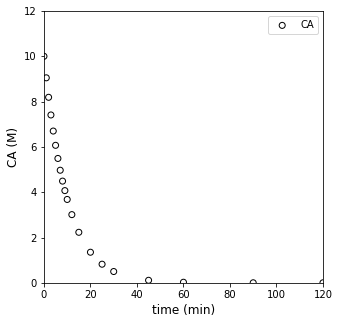

In [2]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 45, 60, 90, 120]) #time in minutes
CA = np.array([10, 9.05, 8.19, 7.41, 6.70, 6.07, 5.49, 4.97, 4.49, 4.07, 3.68, 3.01, 2.23, 1.35, 0.821, 0.498, 0.111, 0.0248, 1.23E-3, 6.14E-05])
#Concentrations in moles per liter

plt.figure(1, figsize = (5, 5))
plt.scatter(t, CA, edgecolor = 'black', color = 'none', label = 'CA')
plt.xlabel('time (min)', fontsize = 12)
plt.ylabel('CA (M)', fontsize = 12)
plt.xlim(0, 120)
plt.ylim(0, 12)
plt.legend()
plt.show()

Determine the rate law and kinetic parameters (k, $\alpha$) for this reaction.

### Solution to Example Problem 01

This is our introduction to an "inverse problem," which involves our determining a model and the parameters for that model based on our observations of data. To this point, we've only used models (material balances, rate laws, etc.) in order to predict data (e.g., reactor volume required for a certain conversion).  Here, we have to work backwards and use the data to develop the correct model. Extracting information from data can be challenging, but we'll work through a couple of methods and highlight some of the pifalls associated with each one to build experience.

In this case, there is no reason to believe that this reaction is an elementary step, so, at best, we can propose that the rate of reaction depends on temperature (which we capture with a rate constant) and the concentration of the reactant, A, with some unknown order, i.e., we'll propose a power law model:

$$r = k{C_A}^\alpha$$

Now we have to make some decisions about how we'll estimate those parameters (k, $\alpha$).  It all starts with the material balance on a constant volume batch reactor.  We'll write one on species A:

$$\frac{dN_A}{dt} = R_AV$$

For a constant volume reactor, we can divide through by V and move it inside of the derivative:

$$\frac{dC_A}{dt} = R_A$$

And for a single reaction, we know that $R_A = -r$, so:

$$\frac{dC_A}{dt} = -r$$

We've proposed power law kinetics here, hence:

$$\frac{dC_A}{dt} = -k{C_A}^\alpha$$

Now we have options.  We can generally choose one of two strategies to approach the problem.  The first is called a ***differential*** method of analysis, wherein we attempt to approximate reaction rates by taking numerical derivatives of data.  The second is an ***integral*** method of analysis, where we attempt to solve the material balance and then regress parameters in the resultant model that best describe our data. Ideally, you'll want to use both of them as each has advantages and disadvantages for the analysis of batch reactor data.

Generally, an ***integral method of analysis*** is easiest if we are able to assume a reaction order (1, 2, 3...).  Once we do that, we know we can solve the differential equation symbolically in terms of k and $C_{A0}$. The hard part about this is there is no guarantee that our reaction will be integer or even positive order with respect to a particular variable, so it can be a bit tedious to consider many different reaction orders.

A ***differential method of analysis*** is fast to apply, and it lets us estimate reaction orders and rate constants without solving a differential equation, but taking numerical derivatives is very imprecise and this method is prone to a lot of error, which can make it very difficult to apply to real world data.

In reality, both methods have strengths and weaknesses, and I always use both of them to give me a complete picture of the system under consideration.  Usually, a combination of differential and integral methods will allow us to get a pretty good idea of the reaction order and any kinetic parameters we need.

### A Differential Analysis of Batch Reactor Data

#### Finite Differences

We'll start with a differential method of analysis.  This is based on approximating derivatives with a finite difference method.  This is really straightforward despite the fancy name.  We simply say that we can approximate derivatives from data using the discrete changes in that data that we observe:

$$\frac{dC_A}{dt} \approx \frac{\Delta C_A}{\Delta t}$$

And that is convenient because we know the relationship between the concentration derivative and the reaction rate, namely:

$$\frac{dC_A}{dt} = -r$$

So, by approximating the concentration derivative, we are actually getting a reasonable approximation of the reaction rate at a certain condition.

$$\frac{\Delta C_A}{\Delta t} \approx -r$$

Let's start there, if we can take those finite differences, we'll get an estimate of reaction rates.  I am specifically going to use a forward difference method here.  What this approximation says is that:

$$\frac{dC_A}{dt}\bigg|_{C_{A_n}} \approx \frac{C_{A_{n+1}} - C_{A_{n}}}{t_{n+1} - t_n}$$

I can quickly find differences between elements in an array using `numpy.diff()`

In [3]:
DCA = np.diff(CA)
Dt  = np.diff(t)
DCADT = DCA/Dt
r = -1*DCADT
display(r)
len(r)

array([9.50000000e-01, 8.60000000e-01, 7.80000000e-01, 7.10000000e-01,
       6.30000000e-01, 5.80000000e-01, 5.20000000e-01, 4.80000000e-01,
       4.20000000e-01, 3.90000000e-01, 3.35000000e-01, 2.60000000e-01,
       1.76000000e-01, 1.05800000e-01, 6.46000000e-02, 2.58000000e-02,
       5.74666667e-03, 7.85666667e-04, 3.89533333e-05])

19

So that is a pretty quick way to convert a concentration vs. time profile into approximate (sometimes very approximate) reaction rates.  As indicated by our definition of the forward difference, these entries represent the derivative at point "n".  So the first rate is the rate at CA[0], the second rate is the rate at CA[1], etc.  The only catch is that I have 20 measurements. I can only get 19 derivatives out of 20 measurements based on the forward difference formula.  So the final rate in our rate array represents the rate at CA[18], i.e., the 19th concentration measurement.  In this case, we don't have an estimate for the rate at CA[19] because we are using a forward difference algorithm at it would require us to know the 21st concentration, which we didn't measure.

This means we have an array of approximate rates at various values of concentration.  We know a model for how rate should vary with concentration:

$$r = k{C_A}^\alpha$$

#### Visualizing rate as a function of CA

Let's plot rate against $C_A$ and see what it looks like:

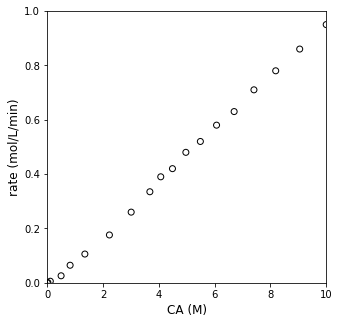

In [4]:
Cmod = CA[:-1] #keep all but last CA entry

plt.figure(1, figsize = (5, 5))
plt.scatter(Cmod, r, edgecolor = 'black', color = 'none')
plt.xlabel('CA (M)', fontsize = 12)
plt.ylabel('rate (mol/L/min)', fontsize = 12)
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.show()

#### Attempting Linearization of rate vs. CA data

Well, OK...looks kind of like rate increases linearly with concentration.  But I'd like to be a bit more quantitative in specifying the reaction order.  We can do this by linearizing the model and regressing a slope and intercept, which we can relate directly to the reaction order and rate constant.  Specifically, we know:

$$r = k{C_A}^\alpha$$

If we take logarithms of each side (i'll use naturals here), we can linearize the model:

$$\ln{r} = \alpha\ln{C_A} + \ln{k}$$

It may not look like it at first glance, but that is just a normal, $y = mx + b$ model, where our slope gives the reaction order $\alpha$, and the y-intercept gives the logarithm of the rate constant.  So, if we plot $\ln{r}$ on the y-axis against $\ln{C_A}$ on the x-axis, we should see a straight line if our power law model holds.  Let's do that below.

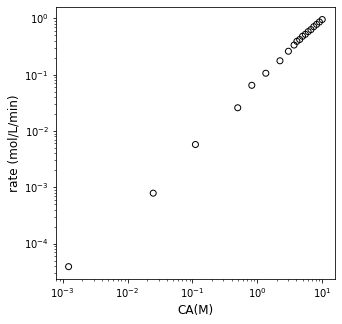

In [5]:
plt.figure(1, figsize = (5, 5))
plt.scatter(Cmod, r, edgecolor = 'black', color = 'none')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('CA(M)', fontsize = 12)
plt.ylabel('rate (mol/L/min)', fontsize = 12)
plt.show()

#### Assessing linearity; linear regression

Is that linear? I really can't tell.  It looks like parts of it are. The best way to tell is for me to fit a line to the data.  Clearly, there are 19 rate vs. CA pairs, so I can't find a single line that goes through all of them.  I can, however, regress the best fit line using any number of methods we discussed during recitation.  I can create a Vandermonde matrix and use linear algebra.  I can use `np.polyfit()`.  Or I can use the least squares version of `np.linalg.solve()`, which is called `np.linalg.lstsq()`.  All give the exact same slope and intercept values.  We'll discuss more what these various tools are doing during recitation this week.  For now, consider them similar to Excel's trendline.

In [6]:
ydata = np.log(r)
xdata = np.log(Cmod)
#X = np.vander(xdata, 2) #Vandermonde for first order regression
#Y = ydata
#A1 = np.linalg.solve(X.T@X, X.T@Y)
A2 = np.polyfit(xdata, ydata, 1)
print(A2)
#A3, SSE, COV, SING = np.linalg.lstsq(X, Y, rcond = None)
#print(A1, A2, A3)

[ 1.14883277 -2.63663575]


Personally, I like the polyfit approach here because it is the easiest to implement, but it is worth knowing the other two as polyfit only works for true polynomials of varying order in your independent variable, and this won't always be the case.  Let's plot the result to see just how straight that line is.  Note that we'll use `np.polyval()` here, which takes the coefficients of a polynomial and the values of independent variable as arguments and returns the value of the dependent variable.

In [7]:
np.polyval(A2, 0)

-2.6366357519164865

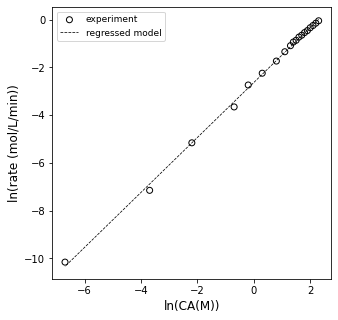

In [8]:
plt.figure(1, figsize = (5, 5))
plt.scatter(xdata, ydata, edgecolor = 'black', color = 'none', label = 'experiment')
plt.plot(xdata, np.polyval(A2, xdata), color = 'black', linestyle = 'dashed', linewidth = 0.75, label = 'regressed model')
plt.xlabel('ln(CA(M))', fontsize = 12)
plt.ylabel('ln(rate (mol/L/min))', fontsize = 12)
plt.legend(fontsize = 9)
plt.show()

OK, so it looks *sort of* linear...let's see what the slope and intercept are...this should tell us the reaction order and rate constant, respectively.

In [9]:
order = A2[0]
lnk   = A2[1]
k     = np.exp(lnk)

print(order, k)

1.1488327656208202 0.07160175086329895


Alright, so according to that analysis, this is a 1.15 order reaction and the rate constant is 0.072 inverse minutes (or so).

The problem is: I don't buy it.  Now is the time to tell you that I generated this data by simulating a batch reactor with the following information:

\begin{align}
    r & = kC_A \\
    k &= 0.1 \ \textrm{min}^{-1} \\
    C_{A0} &= 10 \ \textrm{mol} \ \textrm{L}^{-1} \\
\end{align}

In other words, I generated this by simulating a 100% first order reaction, and I don't like that I'm getting 1.15 order from my differential analysis.  This is actually a common problem when using differential analysis, which is why I chose to highlight it.  The fundamental problem is that we are treating our rates as if we actually measured them, but remember: we estimated them using a finite difference method (similar to an Euler step...):

$$r|_{C_{A_n}} = \frac{dC_A}{dt}\bigg|_{C_{A_n}} \approx \frac{C_{A_{n+1}} - C_{A_{n}}}{t_{n+1} - t_n}$$

That approximation basically assumes that the derivative of concentration with respect to time is constant between $t_n$ and $t_{n+1}$. That can be a pretty good approximation if we consider small changes in time and concentration. That approximation can actually be pretty bad if we assume it is true over large changes in time and/or concentration.  So if we look back at our raw data:

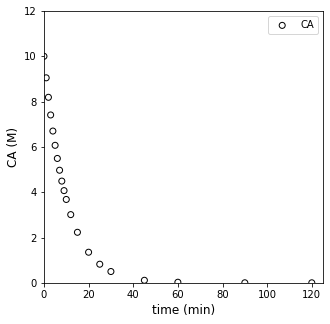

In [10]:
plt.figure(1, figsize = (5, 5))
plt.scatter(t, CA, edgecolor = 'black', color = 'none', label = 'CA')
plt.xlabel('time (min)', fontsize = 12)
plt.ylabel('CA (M)', fontsize = 12)
plt.xlim(0, 125)
plt.ylim(0, 12)
plt.legend()
plt.show()

It kind of looks like we made some bad decisions.  That forward difference is probably a good approximation for derivatives/rates below about 10 - 15 minutes, where we were sampling frequently, and we are considering fairly small changes in concentration and time.  Beyond about 20 minutes, the time steps start to get larger between our measurments...and it is very unlikely we can treat the derivative as constant over that entire range.  I know it is hard to see on a log scale, but if we go back to that linearized form (our plot of ln(rate) vs ln(CA)):

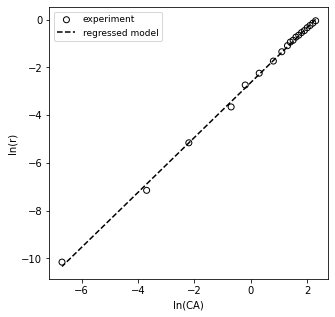

In [11]:
plt.figure(1, figsize = (5, 5))
plt.scatter(xdata, ydata, edgecolor = 'black', color = 'none', label = 'experiment')
plt.plot(xdata, np.polyval(A2, xdata), color = 'black', linestyle = 'dashed', label = 'regressed model')
plt.xlabel('ln(CA)')
plt.ylabel('ln(r)')
plt.legend(fontsize = 9)
plt.show()

We can see that the data looks pretty linear between ln(CA) from about 1 to a bit more than 2.  So, those are high concentrations of A.  Things get a bit chaotic when we look at ln(CA) below about 1, where we start to see a lot more deviation and scatter.  Those are the low concentrations of A, and we have really poor estimates of the rate here because we applied a finite difference over a very large time step (30 minutes, 45 minutes), etc.  So, our data in the CA vs. time graph is actually a perfect data set--I generated it by simulation.  Yet because we've carelessly applied finite differences and treated them as actual derivatives, we've gotten ourselves into a confusing situation.  What should we do?  In this case, I would recommend that we extract the linear portion of the ln(r) vs. ln(CA) plot.  I suggest we do this with a justifiable method, not just throwing out noisy data.  I want to retain all data where the time step was 1 minute or less, because at that point, I see that my concentrations are changing by less than 10% with every measurement.  That is enough to be experimentally distinguishable, but not so much that my finite difference is a terrible approximation.  I can prove that to myself by looking at the np.diff() of CA divided by CA--this gives me percent changes, and you can see where it goes to > 10% at about 10 minutes.

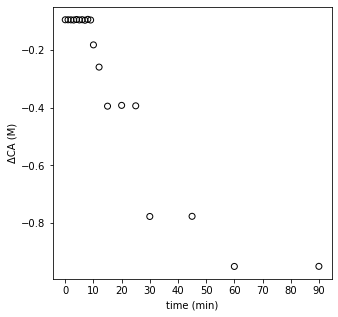

In [12]:
changes = np.diff(CA)/(Cmod)
plt.figure(1, figsize = (5, 5))
plt.scatter(t[:-1], changes, edgecolor = 'black', color = 'none')
plt.xticks(np.linspace(0, 90, 10))
plt.xlabel('time (min)')
plt.ylabel('ΔCA (M)')
plt.show()

With that, I can justify that the data obtained above 10 minutes are not reliable **in the context of a differential analysis** (they are perfect data otherwise, so do not throw them out!).  It's just that the time steps are too large for a finite difference to be a good approximation.  Let's trim the data set and re-do our differential analysis.  I'm only going to keep derivative approximations for concentrations measured at times = 0 to 9 minutes.  I'm doing this because, to get the derivative estimate at 9 minutes, I use the data at 9 minutes and the data at 10 minutes.  To the get the esimtate at 10 minutes, I'd need to use the data at 10 minutes and the next point at 12 minutes, which we've determined has an unacceptably large change in time/concentration for the finite difference to be reliable.

In [13]:
tnew  = t[0:10] 
CAnew = CA[0:10]
print(np.array([tnew, CAnew]).T)

[[ 0.   10.  ]
 [ 1.    9.05]
 [ 2.    8.19]
 [ 3.    7.41]
 [ 4.    6.7 ]
 [ 5.    6.07]
 [ 6.    5.49]
 [ 7.    4.97]
 [ 8.    4.49]
 [ 9.    4.07]]


In [14]:
xdata2 = np.log(CA[0:10])
ydata2 = np.log(r[0:10])
A4 = np.polyfit(xdata2, ydata2, 1)
print(A4)
order = A4[0]
k     = np.exp(A4[1])
print(order, k)

[ 0.99891865 -2.35052037]
0.9989186513365713 0.09531954798315573


First, I note that the order and rate constant are *much closer* to their true values.  They still aren't exact because this whole method is based on finite difference *approximations* to derivatives, but they are pretty good!!

We can overlay the model and linearized data set to see how it looks; visual analysis is great for assessing model fit.  This actually does a great job, and we reasoned our way through which data should and should not be used for a differential analysis.  You can see that finite differences cause problems even for perfect data.  A differential analysis is great, but you do have to beward the limits of precision you run into with the method.

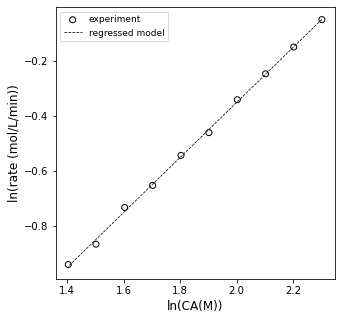

In [15]:
plt.figure(1, figsize = (5, 5))
plt.scatter(xdata2, ydata2, edgecolor = 'black', color = 'none', label = 'experiment')
plt.plot(xdata2, np.polyval(A4, xdata2), color = 'black', linestyle = 'dashed', linewidth = 0.75, label = 'regressed model')
plt.xlabel('ln(CA(M))', fontsize = 12)
plt.ylabel('ln(rate (mol/L/min))', fontsize = 12)
plt.legend(fontsize = 9)
plt.show()